In [3]:
#Imports
from pandas_datareader import  data as web
import pandas as pd
import numpy as np 
from datetime import datetime
import matplotlib.pyplot as plt 
plt.style.use('dark_background')


In [4]:
#Fictional portfolio to optimize 
#FAANG: Facebook Amazon Apple Netflix Google
#Creation of acronyms
stocks=['FB','AMZN','AAPL','NFLX','GOOG']

In [5]:
#Weights for our portfolio's stocks. 
weights=np.array([0.2,0.2,0.2,0.2,0.2])


In [6]:
#Startdates, where Facebook started.
stocksStartdate='2013-01-01'
#Ending date
today=datetime.today().strftime('%Y-%m-%d')
today

'2022-06-10'

In [7]:
#Dataframe with close price of stocks 
df= pd.DataFrame()
#storing the data in this df
for stock in stocks:
    df[stock]=web.DataReader(stock,data_source='yahoo',start=stocksStartdate,end=today)['Adj Close']


In [8]:
#Seeing the df
df

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2021-06-10,332.459991,167.482498,125.393593,487.269989,2521.600098
2021-06-11,331.260010,167.341507,126.626556,488.769989,2513.929932
2021-06-14,336.769989,169.193497,129.738770,499.890015,2527.040039
2021-06-15,336.750000,169.156494,128.903549,491.899994,2520.659912
2021-06-16,331.079987,170.762497,129.410645,492.410004,2513.929932
...,...,...,...,...,...
2022-06-06,194.250000,124.790001,146.139999,197.139999,2340.209961
2022-06-07,195.649994,123.000000,148.710007,198.610001,2344.590088
2022-06-08,196.639999,121.180000,147.960007,202.830002,2344.760010


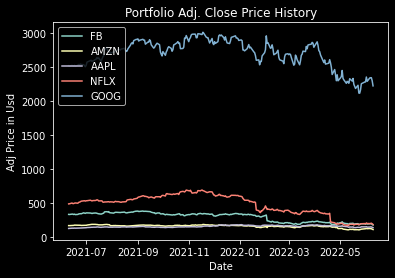

In [9]:
#Visually see stock/Portfolio
title='Portfolio Adj. Close Price History'

#Stocks
my_stocks=df

#Plot
for c in my_stocks.columns.values:
    plt.plot(my_stocks[c], label=c)

plt.title(title)
plt.xlabel('Date')
plt.ylabel('Adj Price in Usd')
plt.legend(my_stocks.columns.values,loc='upper left')
plt.show()


In [10]:
#Daily returns
returns=df.pct_change()
returns

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2021-06-10,NaN,NaN,NaN,NaN,NaN
2021-06-11,-0.003609,-0.000842,0.009833,0.003078,-0.003042
2021-06-14,0.016633,0.011067,0.024578,0.022751,0.005215
2021-06-15,-0.000059,-0.000219,-0.006438,-0.015984,-0.002525
2021-06-16,-0.016837,0.009494,0.003934,0.001037,-0.002670
...,...,...,...,...,...
2022-06-06,0.018188,0.019943,0.005228,-0.009247,0.021355
2022-06-07,0.007207,-0.014344,0.017586,0.007457,0.001872
2022-06-08,0.005060,-0.014797,-0.005043,0.021248,0.000072


In [11]:
#annualized covariance matrix
cov_mat_ann=returns.cov()*252 
cov_mat_ann

,FB,AMZN,AAPL,NFLX,GOOG
FB,0.247032,0.113034,0.078619,0.156350,0.093892
AMZN,0.113034,0.157568,0.071563,0.116475,0.074932
AAPL,0.078619,0.071563,0.083041,0.067212,0.059364
NFLX,0.156350,0.116475,0.067212,0.336805,0.074714
GOOG,0.093892,0.074932,0.059364,0.074714,0.082922


In [12]:
#The portfolio Variance
port_var=np.dot(weights.T,np.dot(cov_mat_ann,weights))
port_var

0.10878720625993492

In [13]:
#the portfolio volatility  (Standard devition)
port_vol=np.sqrt(port_var)
port_vol

0.3298290561183701

In [14]:
#Annual Portfolio return
portfolio_return_annual=np.sum(returns.mean()*weights)*252
portfolio_return_annual

-0.3153047098370763

In [15]:
# Expected annual returns, volatility(risk), and variance
percent_var=str(round(port_var,2)*100) +'%'
percent_vol=str(round(port_vol,2)*100)+'%'
percent_ret=str(round(portfolio_return_annual,2)*100)+'%'
print('Expected annual return: '+percent_ret)
print('Annual volatility / risk :' +percent_vol)
print('Annual Variance: '+percent_var)

Expected annual return: -32.0%
Annual volatility / risk :33.0%
Annual Variance: 11.0%


In [16]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [18]:
#Portfolio optmization
#Expected returns and annualized covariance matrix
m=expected_returns.mean_historical_return(df)
s=risk_models.sample_cov(df)

#optimize for max sharpe ratio
ef=EfficientFrontier(m,s)
weights = ef.max_sharpe()
cleaned_weights= ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('FB', 0.0), ('AMZN', 0.0), ('AAPL', 1.0), ('NFLX', 0.0), ('GOOG', 0.0)])
Expected annual return: 9.8%
Annual volatility: 28.8%
Sharpe Ratio: 0.27


(0.09757708560072476, 0.28816777268707056, 0.26920805500678896)

In [19]:
#Discrete allocation for each share per stock
from pypfopt.discrete_allocation import DiscreteAllocation,get_latest_prices
latest_prices=get_latest_prices(df)
weights=cleaned_weights
da=DiscreteAllocation(weights,latest_prices,total_portfolio_value= 1000)
allocation, leftover=da.lp_portfolio()
print('Discrete allocation: ', allocation)
print('Remaining: ${:.2f}' .format(leftover))

Discrete allocation:  {'AAPL': 7}
Remaining: $36.24
